In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy
import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv("CHD_preprocessed.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   education        4133 non-null   int64  
 3   currentSmoker    4133 non-null   int64  
 4   cigsPerDay       4133 non-null   float64
 5   BPMeds           4133 non-null   float64
 6   prevalentStroke  4133 non-null   int64  
 7   prevalentHyp     4133 non-null   int64  
 8   diabetes         4133 non-null   int64  
 9   totChol          4133 non-null   float64
 10  sysBP            4133 non-null   float64
 11  diaBP            4133 non-null   float64
 12  BMI              4133 non-null   float64
 13  heartRate        4133 non-null   float64
 14  glucose          4133 non-null   float64
 15  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 516.8 KB


In [4]:
data.shape

(4133, 16)

In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.280668,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.449380,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
data.rename(columns ={'male': 'gender'},inplace = True)

# TenYearCHD 

In [9]:
data.TenYearCHD.value_counts()

0    3505
1     628
Name: TenYearCHD, dtype: int64

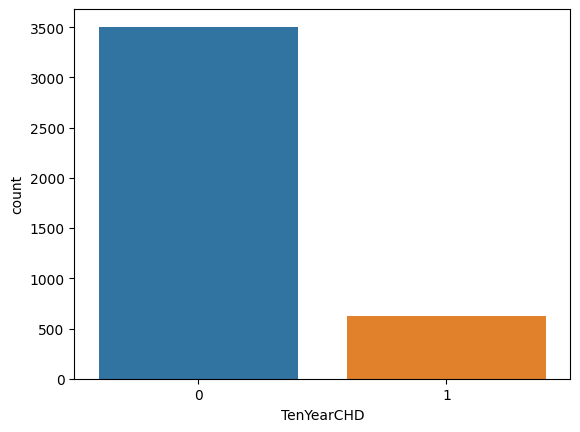

In [10]:
sns.countplot(x = data.TenYearCHD);

# gender

In [11]:
data.gender.value_counts()

0    2367
1    1766
Name: gender, dtype: int64

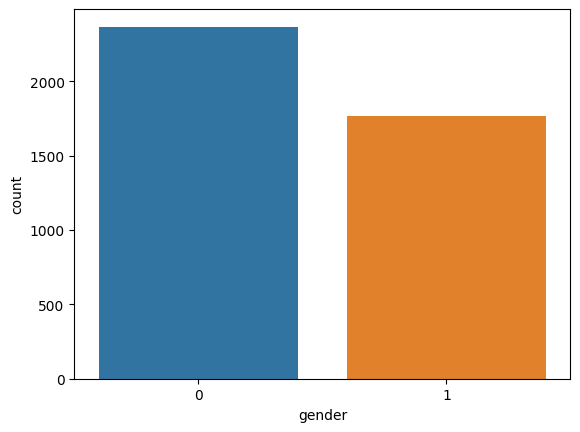

In [12]:
sns.countplot(x = data.gender);

# age 

In [13]:
data.age.describe()

count    4133.000000
mean       49.557222
std         8.561628
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

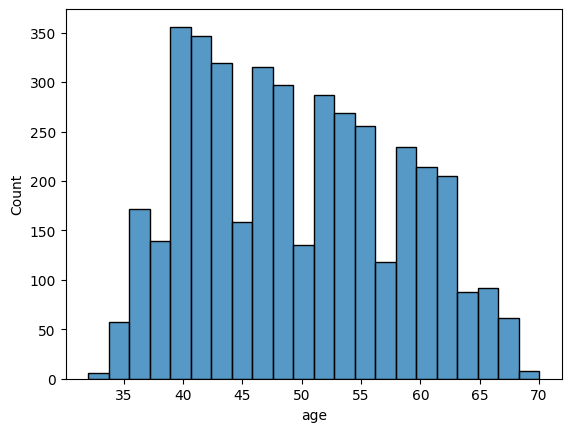

In [14]:
sns.histplot(x = data.age);

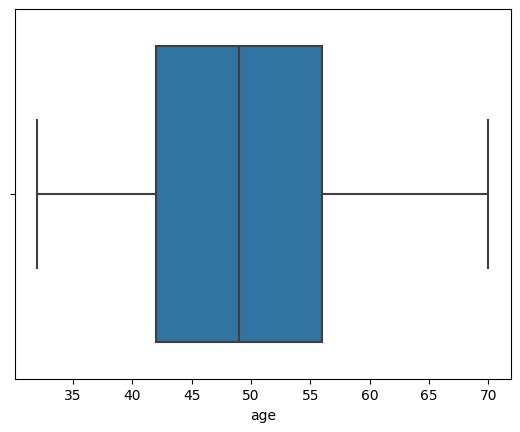

In [15]:
sns.boxplot(x = data.age);

# education

In [16]:
data.education.value_counts()

0    2973
1    1160
Name: education, dtype: int64

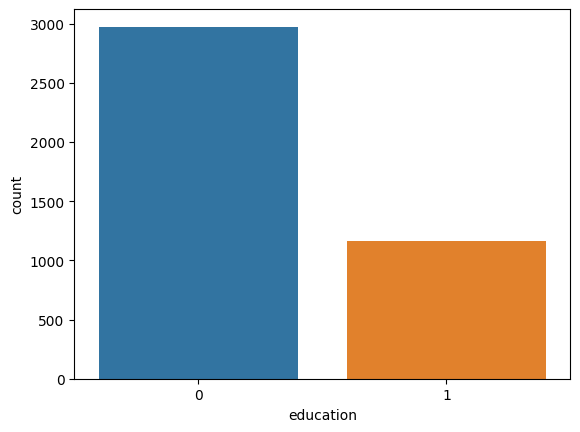

In [17]:
sns.countplot(x = data.education);

# current smoker 

In [18]:
data.currentSmoker.value_counts()

0    2088
1    2045
Name: currentSmoker, dtype: int64

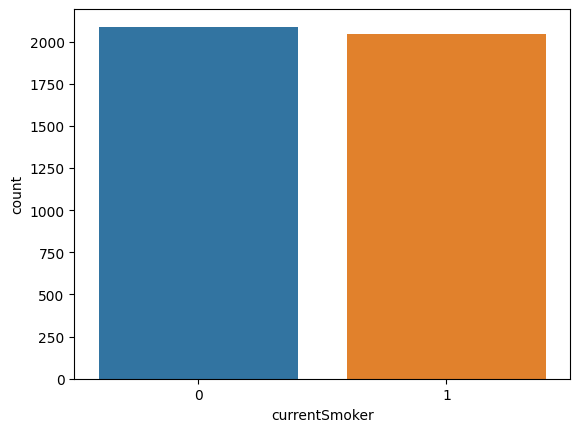

In [19]:
sns.countplot(x = data.currentSmoker);

# cigsPerDay 

In [20]:
data.cigsPerDay.describe()

count    4133.000000
mean        9.101621
std        11.918440
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

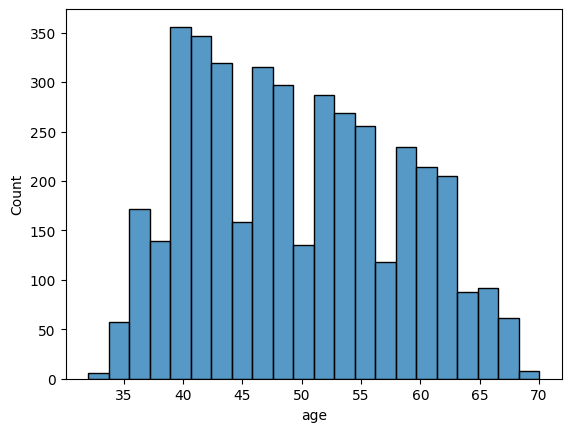

In [21]:
sns.histplot(x = data.age);

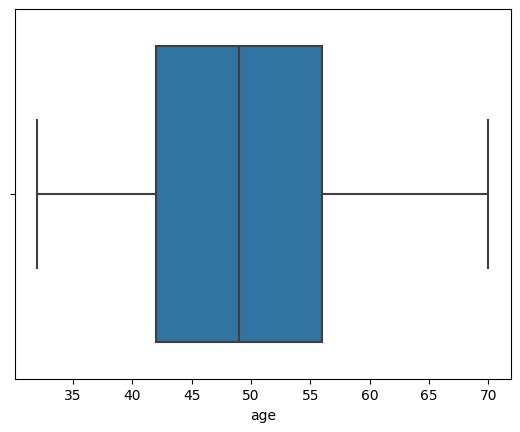

In [22]:
sns.boxplot(x = data.age);

# BPMeds

In [23]:
data.BPMeds.value_counts()

0.0    3991
1.0     142
Name: BPMeds, dtype: int64

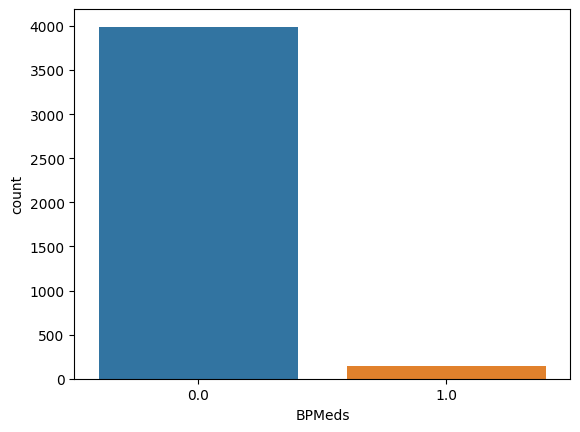

In [24]:
sns.countplot(x = data.BPMeds);

# prevalentStroke

In [25]:
data.prevalentStroke.value_counts()

0    4108
1      25
Name: prevalentStroke, dtype: int64

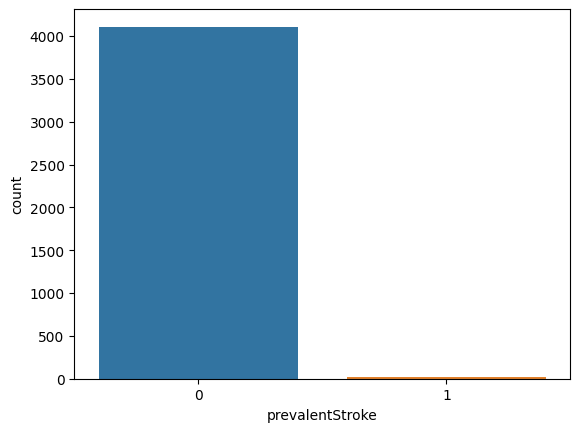

In [26]:
sns.countplot(x = data.prevalentStroke);

# prevalentHyp

In [27]:
data.prevalentHyp.value_counts()

0    2847
1    1286
Name: prevalentHyp, dtype: int64

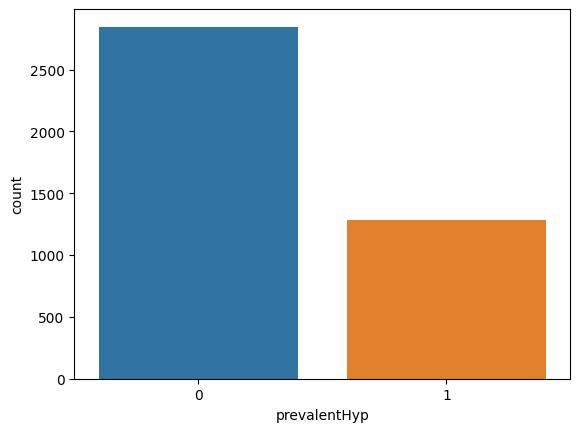

In [28]:
sns.countplot(x =data.prevalentHyp);

# diabetes

In [29]:
data.diabetes.value_counts()

0    4027
1     106
Name: diabetes, dtype: int64

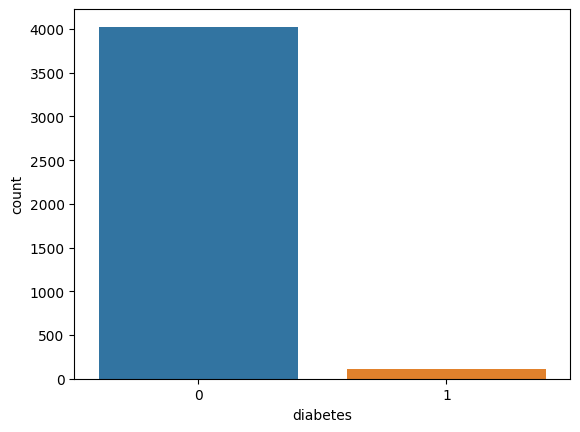

In [30]:
sns.countplot(x =data.diabetes);

# totChol 

In [31]:
data.totChol.describe()

count    4133.000000
mean      236.664408
std        43.909188
min       107.000000
25%       206.000000
50%       234.000000
75%       262.000000
max       600.000000
Name: totChol, dtype: float64

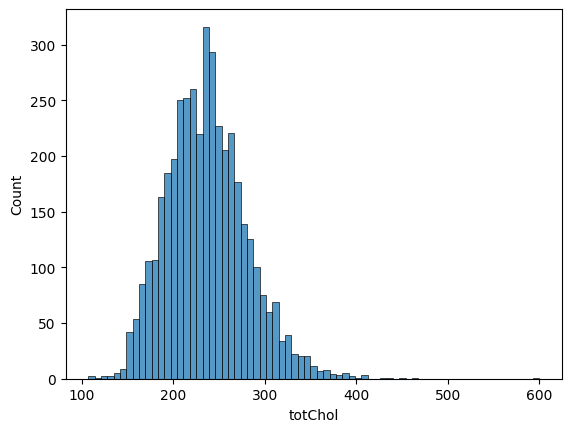

In [32]:
sns.histplot(x = data.totChol);

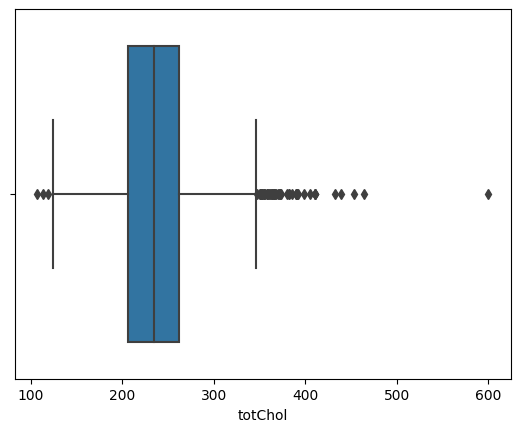

In [33]:
sns.boxplot(x = data.totChol);

In [34]:
IQR = data.totChol.describe()["75%"] - data.totChol.describe()["25%"]
upper =data.totChol.describe()["75%"] + 1.5 * IQR

In [35]:
data.totChol= np.where(data.totChol > upper,upper,data.totChol)

# sysBP

In [36]:
data.sysBP.describe()

count    4133.000000
mean      132.367046
std        22.080332
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

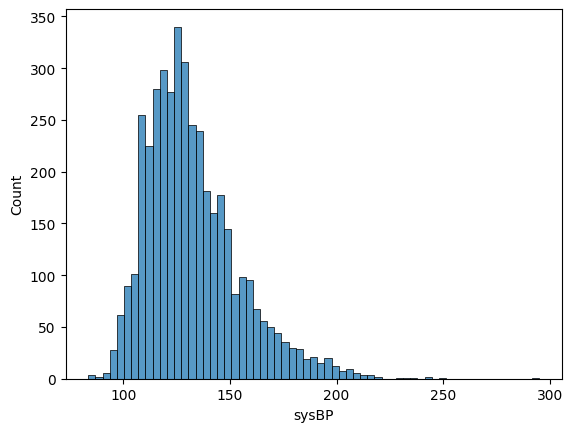

In [37]:
sns.histplot(x = data.sysBP);

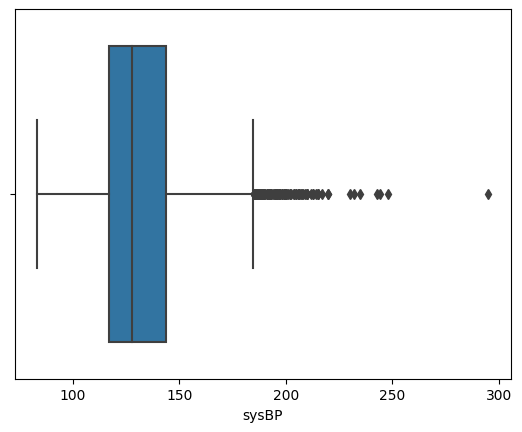

In [38]:
sns.boxplot(x = data.sysBP);

In [39]:
IQR = data.sysBP.describe()["75%"] - data.sysBP.describe()["25%"]
upper = data.sysBP.describe()["75%"] + 1.5 * IQR
len(data.sysBP[data.sysBP > upper])

124

In [40]:
data.sysBP= np.where(data.sysBP > upper,upper,data.sysBP)

# diaBP

In [41]:
data.diaBP.describe()

count    4133.000000
mean       82.872248
std        11.952654
min        48.000000
25%        75.000000
50%        82.000000
75%        89.500000
max       142.500000
Name: diaBP, dtype: float64

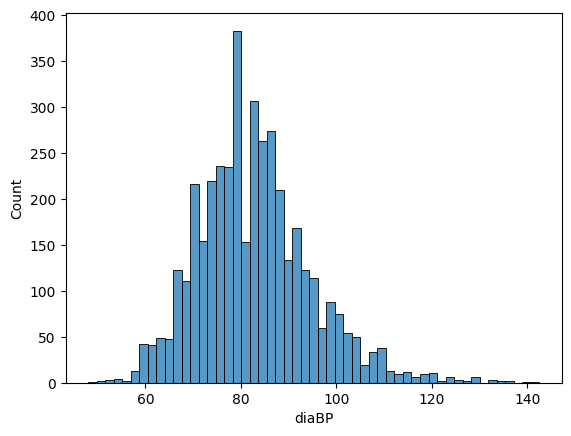

In [42]:
sns.histplot(x = data.diaBP);

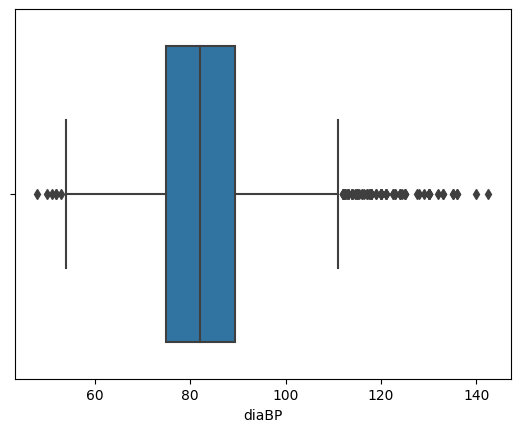

In [43]:
sns.boxplot(x = data.diaBP);

In [44]:
IQR =data.diaBP.describe()["75%"] - data.diaBP.describe()["25%"]
upper =data.diaBP.describe()["75%"] + 1.5 * IQR
len(data.diaBP[data.diaBP> upper])

81

In [45]:
data.diaBP= np.where(data.diaBP > upper ,upper ,data.diaBP)

# BMI

In [46]:
data.BMI.describe()

count    4133.000000
mean       25.778571
std         4.074360
min        15.540000
25%        23.060000
50%        25.380000
75%        27.990000
max        56.800000
Name: BMI, dtype: float64

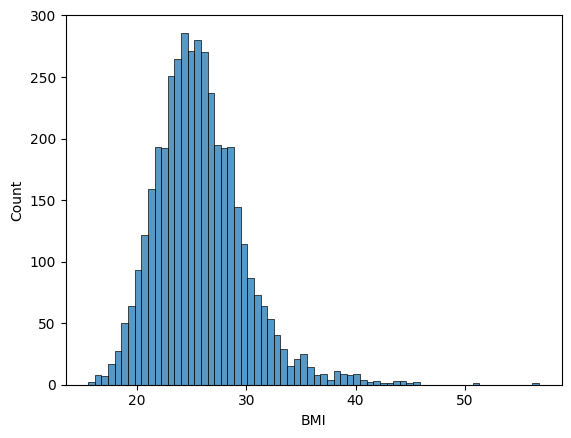

In [47]:
sns.histplot(x = data.BMI);

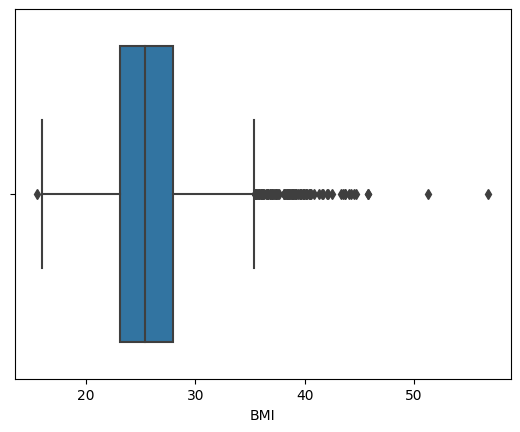

In [48]:
sns.boxplot(x = data.BMI);

In [49]:
IQR =data.BMI.describe()["75%"] - data.BMI.describe()["25%"]
upper =data.BMI.describe()["75%"] + 1.5 * upper
len(data.BMI[data.BMI> upper])

0

In [50]:
data.BMI= np.where(data.BMI>upper,upper,data.BMI)

# heartRate  

In [51]:
data.heartRate.describe()

count    4133.000000
mean       75.925236
std        12.049188
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

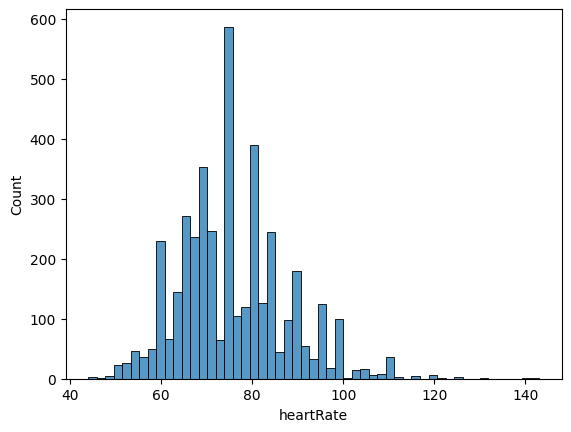

In [52]:
sns.histplot(x = data.heartRate);

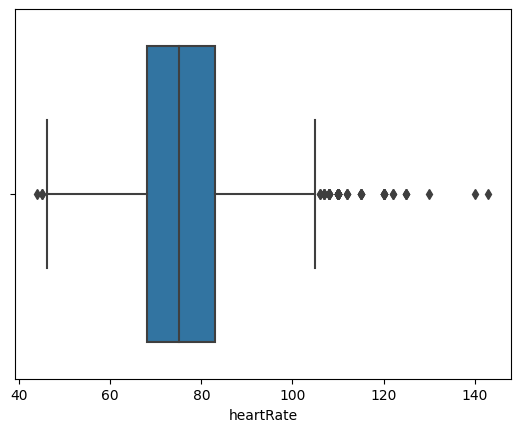

In [53]:
sns.boxplot(x = data.heartRate);

In [54]:
IQR =data.heartRate.describe()["75%"] - data.heartRate.describe()["25%"]
upper =data.heartRate.describe()["75%"] + 1.5 * IQR
len(data.heartRate[data.heartRate> upper])

73

In [55]:
data.heartRate= np.where(data.heartRate > upper,upper,data.heartRate)


# glucose

In [56]:
data.glucose.describe()

count    4133.000000
mean       81.946528
std        22.860954
min        40.000000
25%        72.000000
50%        80.000000
75%        85.000000
max       394.000000
Name: glucose, dtype: float64

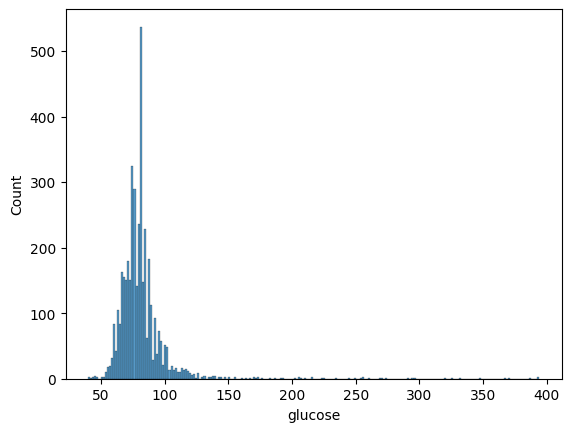

In [57]:
sns.histplot(data.glucose);

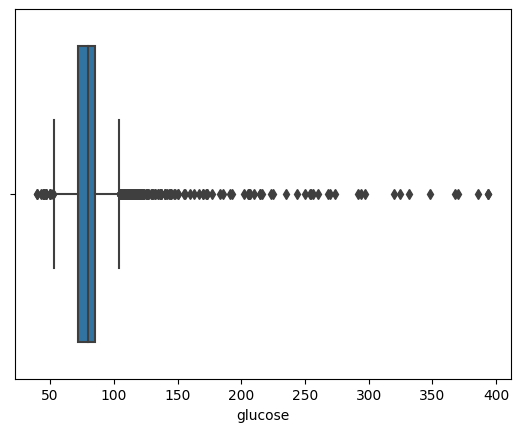

In [58]:
sns.boxplot(x = data.glucose);

In [59]:
IQR =data.glucose.describe()["75%"] - data.glucose.describe()["25%"]
upper=data.glucose.describe()["75%"] + 1.5 * IQR
len(data.glucose[data.glucose > upper])

235

In [60]:
data.glucose= np.where(data.glucose > upper ,upper ,data.glucose)

# statistical test for categorical data

In [61]:
gender = pd.crosstab(data.TenYearCHD,data.gender,margins = True)
scipy.stats.chi2_contingency(gender,correction= False )[1]

7.211950697748259e-06

In [62]:
education = pd.crosstab(data.TenYearCHD,data.education,margins = True)
scipy.stats.chi2_contingency(education,correction= False )[1]

0.5411080905098022

In [63]:
currentSmoker = pd.crosstab(data.TenYearCHD,data.currentSmoker,margins = True)
scipy.stats.chi2_contingency( currentSmoker,correction= False )[1]

0.8894358798382614

In [64]:
BPMeds =pd.crosstab(data.TenYearCHD,data.BPMeds,margins = True)
scipy.stats.chi2_contingency(BPMeds,correction= False )[1]

2.1980533690678527e-07

In [65]:
prevalentStroke = pd.crosstab(data.TenYearCHD,data.prevalentStroke,margins = True)
scipy.stats.chi2_contingency(prevalentStroke,correction= False )[1]

0.002767452225891981

In [66]:
prevalentStroke = pd.crosstab(data.TenYearCHD,data.prevalentHyp,margins = True)
scipy.stats.chi2_contingency(prevalentStroke,correction= False )[1]

5.931085185978504e-28

In [67]:
diabetes = pd.crosstab(data.TenYearCHD,data.diabetes,margins = True)
scipy.stats.chi2_contingency( diabetes,correction= False )[1]

5.811543820479649e-08

In [68]:
data.drop(columns=['currentSmoker','education'],axis = 1,inplace=True)

# statistical test for continous data

In [69]:
model = ols('TenYearCHD ~age ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,27.748701,27.748701,227.067152,5.419794e-50
Residual,4131.0,504.828120,0.122205,NaN,NaN


In [70]:
model = ols('TenYearCHD ~cigsPerDay ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
cigsPerDay,1.0,1.470965,1.470965,11.44133,0.000725
Residual,4131.0,531.105855,0.128566,NaN,NaN


In [71]:
model = ols('TenYearCHD ~ totChol ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
totChol,1.0,3.299407,3.299407,25.75181,4.053336e-07
Residual,4131.0,529.277413,0.128123,NaN,NaN


In [72]:
model = ols('TenYearCHD ~sysBP ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
sysBP,1.0,23.926017,23.926017,194.314792,3.410671e-43
Residual,4131.0,508.650804,0.123130,NaN,NaN


In [73]:
model = ols('TenYearCHD ~diaBP ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
diaBP,1.0,10.44147,10.441470,82.610217,1.517120e-19
Residual,4131.0,522.13535,0.126394,NaN,NaN


In [74]:
model = ols('TenYearCHD ~ BMI',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
BMI,1.0,2.771151,2.771151,21.607214,0.000003
Residual,4131.0,529.805670,0.128251,NaN,NaN


In [75]:
model = ols('TenYearCHD ~ heartRate',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
heartRate,1.0,0.221119,0.221119,1.715853,0.190301
Residual,4131.0,532.355701,0.128868,NaN,NaN


In [76]:
model = ols('TenYearCHD ~glucose ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
glucose,1.0,1.784633,1.784633,13.889277,0.000196
Residual,4131.0,530.792187,0.128490,NaN,NaN


In [77]:
data.drop(columns=['heartRate'],axis = 1,inplace=True)

In [78]:
data.columns

Index(['gender', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'glucose', 'TenYearCHD'],
      dtype='object')

In [79]:
x=data.iloc[:,[1,2,7,8,9,10,11]]
x['intersept']=1
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns

In [80]:
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
print(vif_data)

      feature         VIF
0         age    1.331488
1  cigsPerDay    1.046879
2     totChol    1.103675
3       sysBP    3.064936
4       diaBP    2.803648
5         BMI    1.180565
6     glucose    1.029583
7   intersept  139.041699


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   cigsPerDay       4133 non-null   float64
 3   BPMeds           4133 non-null   float64
 4   prevalentStroke  4133 non-null   int64  
 5   prevalentHyp     4133 non-null   int64  
 6   diabetes         4133 non-null   int64  
 7   totChol          4133 non-null   float64
 8   sysBP            4133 non-null   float64
 9   diaBP            4133 non-null   float64
 10  BMI              4133 non-null   float64
 11  glucose          4133 non-null   float64
 12  TenYearCHD       4133 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 419.9 KB


<AxesSubplot: >

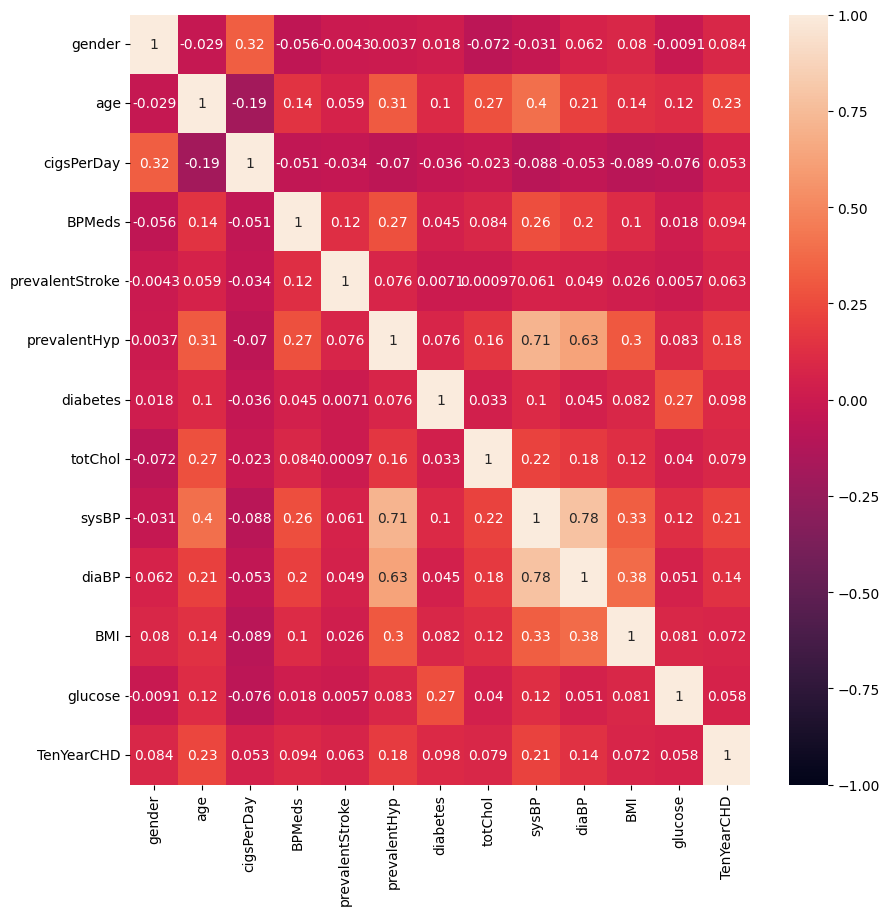

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, vmin= -1, vmax=1)

# MODEL-1 LOGISTIC REGRESSION

In [83]:
data.columns

Index(['gender', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'glucose', 'TenYearCHD'],
      dtype='object')

In [84]:
X=data[['gender', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'glucose']]
y=data[['TenYearCHD']]

In [85]:
model1=LogisticRegression(solver="liblinear",random_state=0)
model1                          

LogisticRegression(random_state=0, solver='liblinear')

In [86]:
model1.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [87]:
model1.intercept_

array([-5.53019613])

In [88]:
model1.coef_

array([[ 4.52957281e-01,  5.46799414e-02,  1.77110622e-02,
         3.55284074e-01,  8.06154430e-01,  4.40252656e-01,
         8.32690450e-01,  3.00175962e-04,  1.43410817e-02,
        -1.30350443e-02, -9.28710027e-03, -3.33744780e-03]])

In [89]:
y_pred=model1.predict(X)

In [90]:
confusion_matrix=metrics.confusion_matrix(y,y_pred)
confusion_matrix

array([[3493,   12],
       [ 596,   32]], dtype=int64)

In [91]:
model1.score(X,y)

0.8528913622066295

In [92]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3505
           1       0.73      0.05      0.10       628

    accuracy                           0.85      4133
   macro avg       0.79      0.52      0.51      4133
weighted avg       0.83      0.85      0.79      4133



In [93]:
# roc curve
y_pred_prob=model1.predict_proba(X)
fpr,tpr,threshold=roc_curve(data["TenYearCHD"],y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.7289159253841191


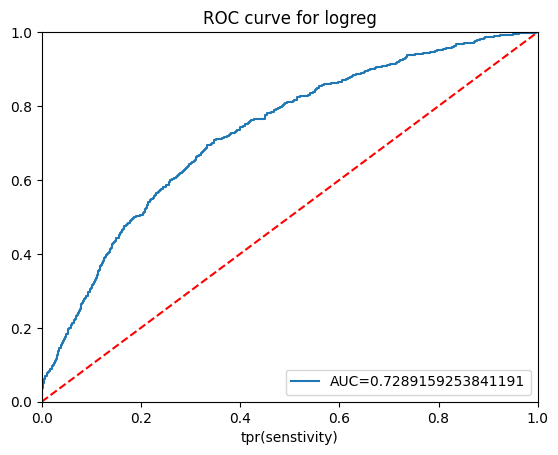

In [94]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label="AUC="+str(roc_auc))
plt.legend(loc=4)
plt.show()

# USING GLM METHOD- MODEL 2

In [95]:
data.columns

Index(['gender', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'glucose', 'TenYearCHD'],
      dtype='object')

In [96]:
model2=smf.glm(formula='TenYearCHD~gender+age+cigsPerDay+BPMeds+prevalentStroke+prevalentHyp+diabetes+totChol+sysBP+diaBP+BMI+glucose', 
               data=data,family=sm.families.Binomial())
result=model2.fit()

In [97]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 4133
Model:                            GLM   Df Residuals:                     4120
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1571.6
Date:                Mon, 15 May 2023   Deviance:                       3143.3
Time:                        19:10:52   Pearson chi2:                 4.11e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08755
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.9014      0.666    -

In [98]:
model3=smf.glm(formula='TenYearCHD~age+cigsPerDay++prevalentStroke+prevalentHyp+diabetes+sysBP',data=data,family=sm.families.Binomial())
result1=model3.fit()

In [99]:
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 4133
Model:                            GLM   Df Residuals:                     4126
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1584.5
Date:                Mon, 15 May 2023   Deviance:                       3169.0
Time:                        19:10:52   Pearson chi2:                 4.05e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08185
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.3422      0.451    -

In [100]:
predictions3=result1.predict()
predictions3

array([0.03404792, 0.06407101, 0.12676084, ..., 0.13200885, 0.08773979,
       0.10742354])

In [101]:
predictions_nominal3=[0 if x<0.5 else 1 for x in predictions3]

In [102]:
fpr3,tpr3,threshold3=roc_curve(data["TenYearCHD"],predictions3)
roc_auc3=auc(fpr3,tpr3)
print(roc_auc3)

0.7247321842318071


In [103]:
print(classification_report(data["TenYearCHD"],predictions_nominal3))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3505
           1       0.67      0.06      0.11       628

    accuracy                           0.85      4133
   macro avg       0.76      0.53      0.52      4133
weighted avg       0.83      0.85      0.80      4133



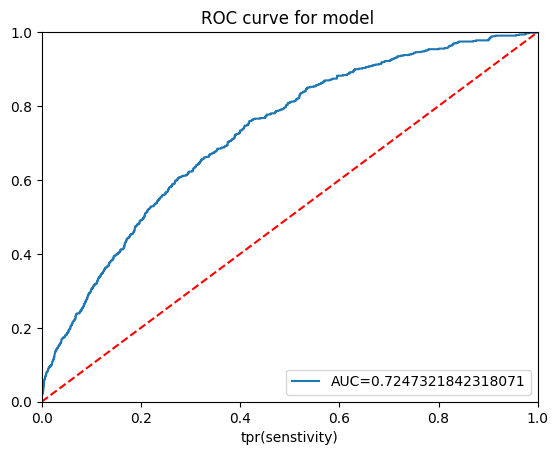

In [104]:
#roc curve
plt.title("ROC curve for model ")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr3,tpr3,label="AUC="+str(roc_auc3))
plt.legend(loc=4)
plt.show()

# decision tree

In [105]:
x1=data.iloc[:,0:-1]
y1=data.iloc[:,-1]

In [106]:
x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size = 0.20, random_state = 1)

In [107]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3306, 12) (827, 12) (3306,) (827,)


In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [109]:
clf=tree.DecisionTreeClassifier(random_state=40)

In [110]:
model4=clf.fit(x_train, y_train)

In [111]:
y_train_pred= model4.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
y_test_pred= model4.predict(x_test)
y_test_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [113]:
accuracy_score(y_train,y_train_pred)

1.0

In [114]:
accuracy_score(y_test,y_test_pred)

0.7388149939540508

In [115]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

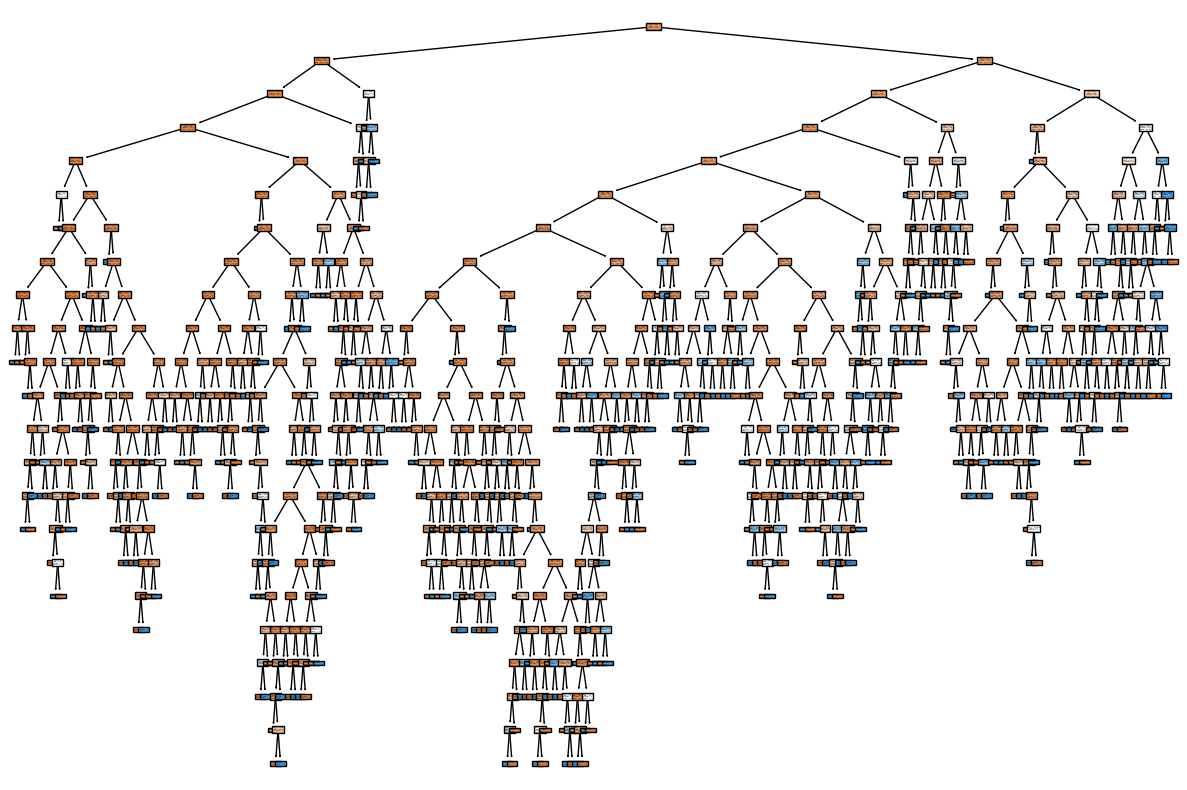

In [116]:
plt.figure(figsize=(15,10))
a = plot_tree(model4,filled=True)
plt.show()

In [117]:
model4.get_depth()

22

In [118]:
depth = [1,2,3,4,5]

accuracy_train,accuracy_test= [],[]

for i in depth:
    tree = DecisionTreeClassifier(max_depth= i, random_state=50)
    
    tree.fit(x_train, y_train)
    y_train_pred1=tree.predict(x_train)
    y_test_pred1=tree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred1))
    accuracy_test.append(accuracy_score(y_test, y_test_pred1))

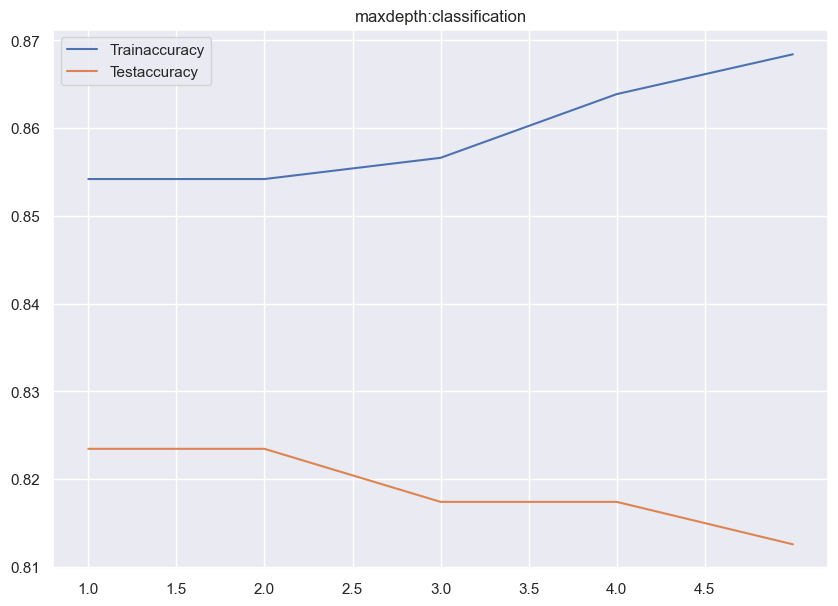

In [119]:
sns.set()
plt.figure(figsize = (10,7))
sns.lineplot(y=accuracy_train,x = depth, label = 'Trainaccuracy')
sns.lineplot(y=accuracy_test, x = depth, label = 'Testaccuracy')
plt.title("maxdepth:classification")
plt.xticks(ticks=np.arange(1,5,0.5))
plt.show()

In [120]:
tree2= DecisionTreeClassifier(max_depth=4, random_state=50)    
tree2.fit(x_train, y_train)
y_train_pred2=tree2.predict(x_train)
y_train_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
y_test_pred2=tree2.predict(x_test)
y_test_pred2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [122]:
accuracytrain=(accuracy_score(y_train,y_train_pred2))
accuracytrain

0.8638838475499092

In [123]:
accuracytest=(accuracy_score(y_test,y_test_pred2))
accuracytest

0.8174123337363967

In [124]:
pd.crosstab(y_test,y_test_pred2,margins=True,rownames=['Actual'],colnames=['predict'])

predict,0,1,All
Actual,,,
0,669,12,681
1,139,7,146
All,808,19,827


In [125]:
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       681
           1       0.37      0.05      0.08       146

    accuracy                           0.82       827
   macro avg       0.60      0.52      0.49       827
weighted avg       0.75      0.82      0.75       827



In [126]:
# roc curve
y_pred_prob=tree2.predict_proba(x_test)
fpr4,tpr4,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc4=auc(fpr4,tpr4)
print(roc_auc4)

0.6366493673686964


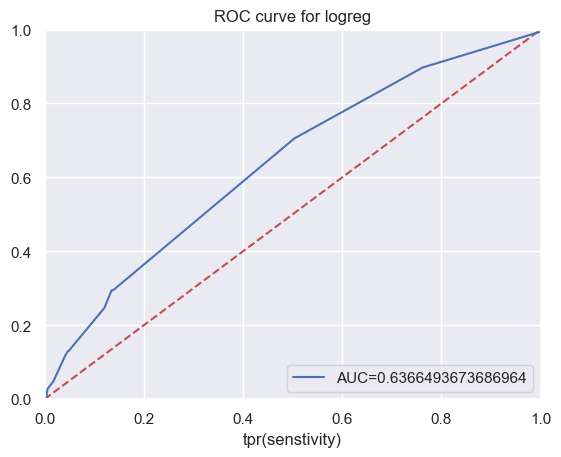

In [127]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr4,tpr4,label="AUC="+str(roc_auc4))
plt.legend(loc=4)
plt.show()

# Random forest

In [128]:
model5= RandomForestClassifier(n_estimators =100, random_state = 0 )
model5

RandomForestClassifier(random_state=0)

In [129]:
model5.fit(x_train,y_train)
model5

RandomForestClassifier(random_state=0)

In [130]:
y_predRF= model5.predict(x_test)
y_predRF

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predRF)
confusion_matrix

array([[673,   8],
       [137,   9]], dtype=int64)

In [132]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       681
           1       0.53      0.06      0.11       146

    accuracy                           0.82       827
   macro avg       0.68      0.52      0.51       827
weighted avg       0.78      0.82      0.76       827



In [133]:
# roc curve
y_pred_prob=model5.predict_proba(x_test)
fpr5,tpr5,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc5=auc(fpr5,tpr5)
print(roc_auc5)

0.639812523887112


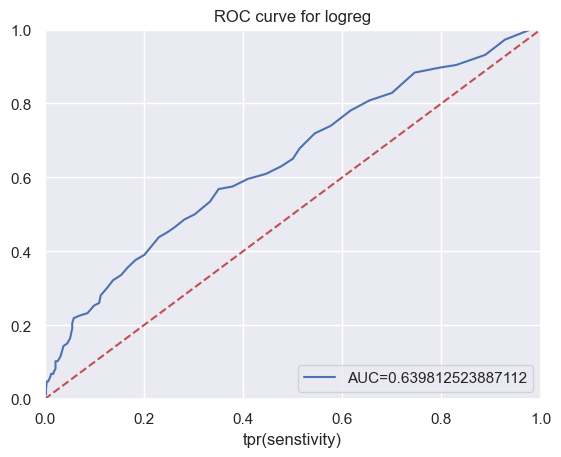

In [134]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr5,tpr5,label="AUC="+str(roc_auc5))
plt.legend(loc=4)
plt.show()

# Random forest using Grid search

In [135]:
param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,13,14,15,16,17],
              'max_features': ['auto', 'log2'],
              'n_estimators': [25,50,100,150,200]}

In [136]:
rfc= RandomForestClassifier(random_state = 1)
rfc

RandomForestClassifier(random_state=1)

In [137]:
g_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3)

In [138]:
model6= g_search.fit(x_train,y_train)

In [139]:
print(model6.best_params_)

{'max_depth': 9, 'max_features': 'auto', 'n_estimators': 200}


In [140]:
y_pred= model6.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [141]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,680,1,681
1,140,6,146
All,820,7,827


In [142]:
accuracytest=(accuracy_score(y_test, y_pred))
accuracytest

0.8295042321644498

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       681
           1       0.86      0.04      0.08       146

    accuracy                           0.83       827
   macro avg       0.84      0.52      0.49       827
weighted avg       0.83      0.83      0.76       827



In [144]:
# roc curve
y_pred_prob=model6.predict_proba(x_test)
fpr6,tpr6,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc6=auc(fpr6,tpr6)
print(roc_auc6)

0.6667773017118259


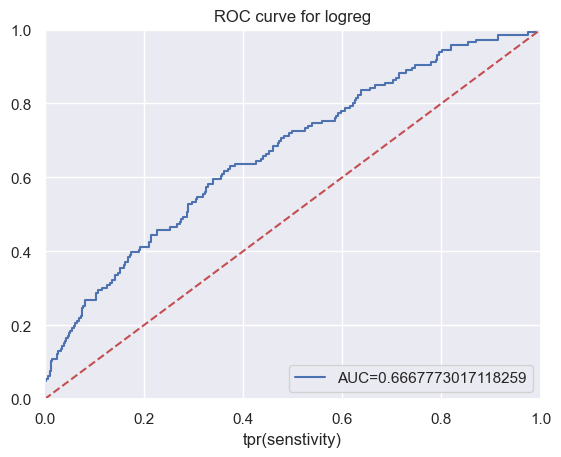

In [145]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr6,tpr6,label="AUC="+str(roc_auc6))
plt.legend(loc=4)
plt.show()

# gradient boosting

In [146]:
model8= GradientBoostingClassifier(max_depth=1,n_estimators =50,learning_rate=1.0,random_state=0)
model8

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50,
                           random_state=0)

In [147]:
model8 = model8.fit(x_train,y_train)
model8

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50,
                           random_state=0)

In [148]:
y_predGB=model8.predict(x_test)
print(y_predGB)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

In [149]:
pd.crosstab(y_test,y_predGB,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,671,10,681
1,132,14,146
All,803,24,827


In [150]:
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support

           0       0.84      0.99      0.90       681
           1       0.58      0.10      0.16       146

    accuracy                           0.83       827
   macro avg       0.71      0.54      0.53       827
weighted avg       0.79      0.83      0.77       827



In [151]:
y_pred_prob=model8.predict_proba(x_test)
fpr8,tpr8,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc8=auc(fpr8,tpr8)
print(roc_auc8)

0.689296562267415


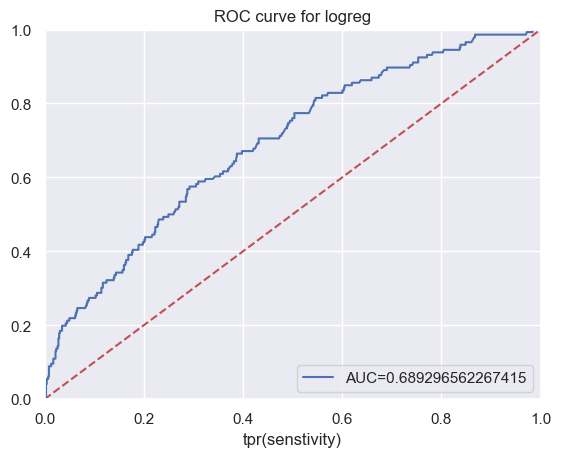

In [152]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr8,tpr8,label="AUC="+str(roc_auc8))
plt.legend(loc=4)
plt.show()

# navie bayes classifier

In [153]:
model8=GaussianNB()

In [154]:
model8=model8.fit(x_train,y_train)

In [155]:
y_pred=model8.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [156]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,624,57,681
1,114,32,146
All,738,89,827


In [157]:
accuracy_score(y_test,y_pred)

0.7932285368802902

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       681
           1       0.36      0.22      0.27       146

    accuracy                           0.79       827
   macro avg       0.60      0.57      0.58       827
weighted avg       0.76      0.79      0.77       827



In [159]:
y_pred_prob=model8.predict_proba(x_test)
fpr8,tpr8,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc8=auc(fpr8,tpr8)
print(roc_auc8)

0.6590781083418823


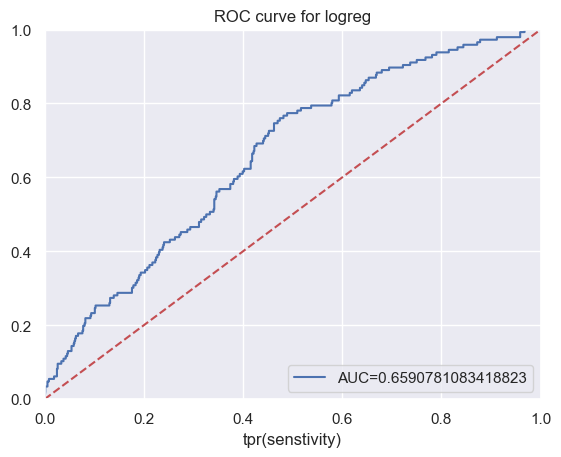

In [160]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr8,tpr8,label="AUC="+str(roc_auc8))
plt.legend(loc=4)
plt.show()

# Knn neighbour

In [161]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='ball_tree',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [162]:
model9=model.fit(x_train,y_train)

In [163]:
y_pred=model9.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [164]:
pd.crosstab(y_test,y_pred,margins=True)

col_0,0,1,All
TenYearCHD,,,
0,645,36,681
1,135,11,146
All,780,47,827


In [165]:
accuracy_score(y_test,y_pred)

0.7932285368802902

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       681
           1       0.23      0.08      0.11       146

    accuracy                           0.79       827
   macro avg       0.53      0.51      0.50       827
weighted avg       0.72      0.79      0.75       827



In [167]:
y_pred_prob=model9.predict_proba(x_test)
fpr9,tpr9,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc9=auc(fpr9,tpr9)
print(roc_auc9)

0.5627904169935429


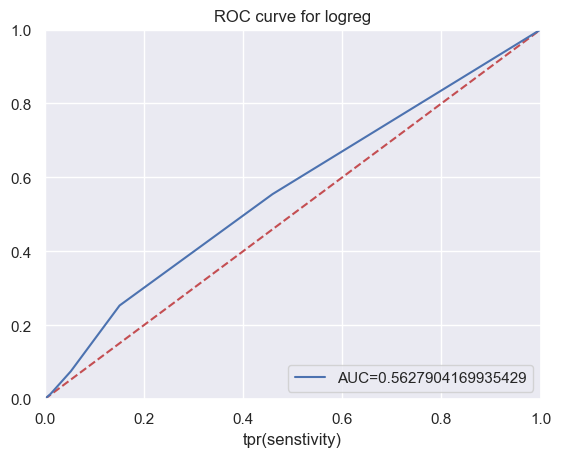

In [168]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr9,tpr9,label="AUC="+str(roc_auc9))
plt.legend(loc=4)
plt.show()